# Exploration of effect of loan features on Borrower APR
## by Francisco Pineda

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of loans that could be used to predict the borrower APR. The main focus was on prosper rating, credit score upper limit and Estimated Return.

## Dataset Overview

> The data consisted of the parameters of approximately 113000 loans. The attributes include Borrower APR, Prosper Rating, Credit Score, and Estimated Return.  I Created new DataFrames for different visualzations where I removed loans that did not have those parameters.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("prosperLoanData.csv")

In [3]:
#clean up dataframe for visualizations 
df_Deliquencies = df[["BorrowerAPR",'CurrentDelinquencies']]
df_Deliquencies.dropna(inplace=True)

df_ProsperRating = df[["BorrowerAPR",'ProsperRating (numeric)']]
df_ProsperRating.dropna(inplace=True)

df_EstimatedReturn = df[["BorrowerAPR",'EstimatedReturn']]
df_EstimatedReturn.dropna(inplace=True)

df_Credit = df[["CreditScoreRangeUpper",'BorrowerAPR']]
df_Credit.dropna(inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower APR Distribution

> APRs range from nearly zero to over .4. There appears to be a slight right skew to the distribution.

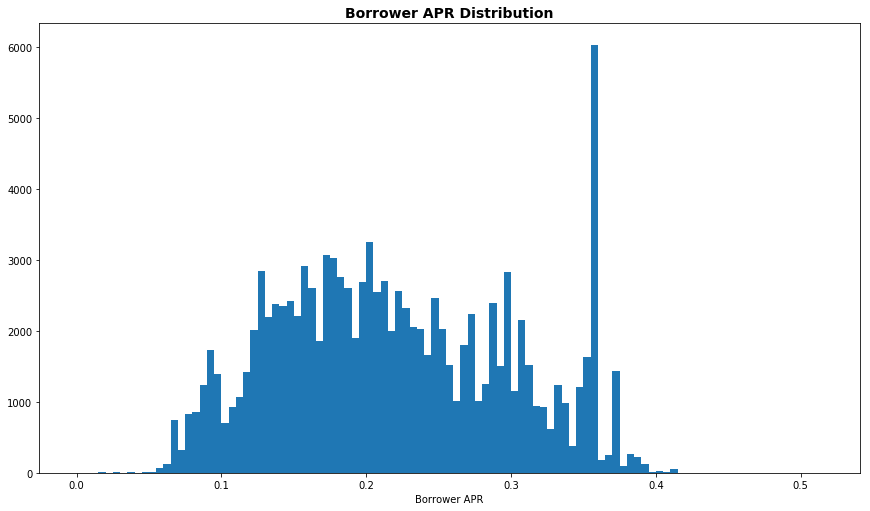

In [4]:
#distrubtion of Borrower APR
binsize = .005
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins,range=(0,1) )
plt.title("Borrower APR Distribution", fontsize =14, weight = "bold")
plt.xlabel('Borrower APR')
plt.show()

## Credit Score Range Upper Distribution

> This shows the distribution of Credit Score Range Upper for Each loan. It appears roughly normal.

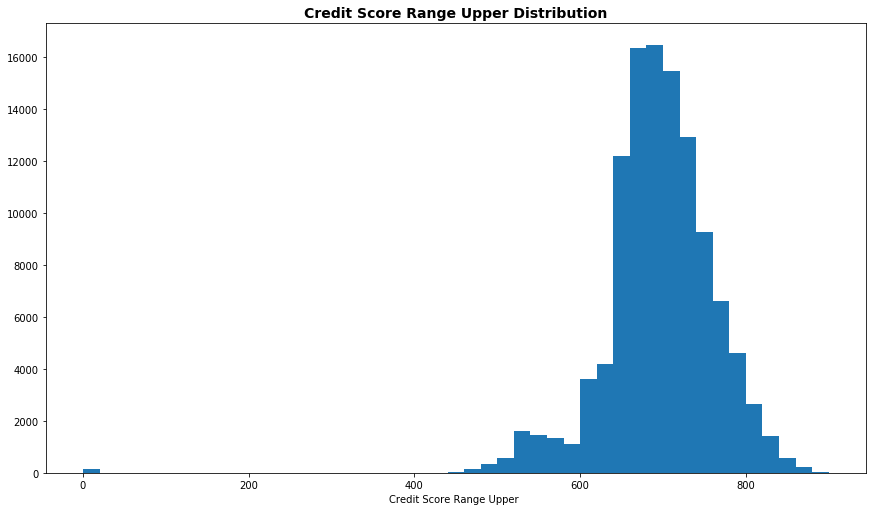

In [5]:
binsize = 20
bins = np.arange(0, df['CreditScoreRangeUpper'].max()+binsize, binsize)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bins,range=(0,1) )
plt.title("Credit Score Range Upper Distribution", fontsize =14, weight = "bold")
plt.xlabel('Credit Score Range Upper ')
plt.show()


## Estimated Return Vs Prosper Rating

> This shows a strong negative correlation between Borrower APR and and Prosper Rating

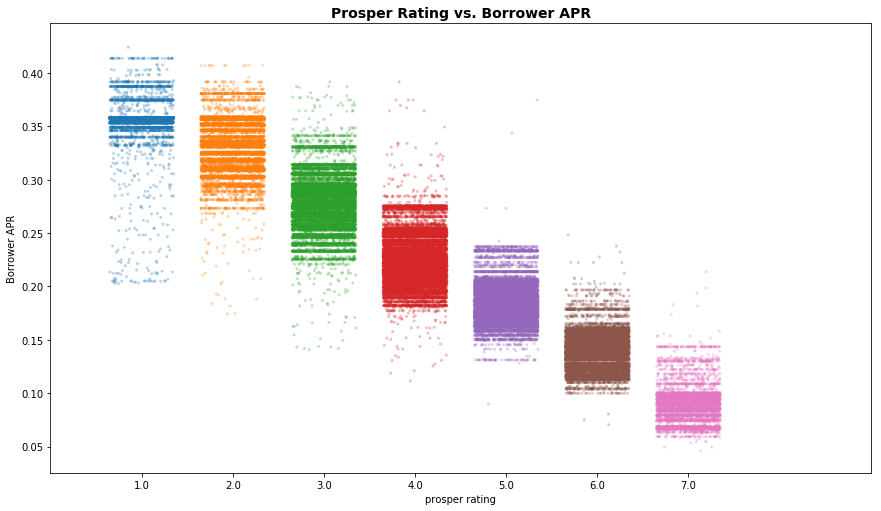

In [6]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data =  df_ProsperRating,
             x = 'ProsperRating (numeric)', y = 'BorrowerAPR', alpha = 0.3, jitter = .35, size = 3)
plt.xlim([-1, 8])
plt.title("Prosper Rating vs. Borrower APR", fontsize =14, weight = "bold")
plt.xlabel('prosper rating')
plt.ylabel('Borrower APR')
plt.show()


## Estimated Return Vs Borrower APR

> This shows a moderate correlation between Borrower APR and Estimated Return

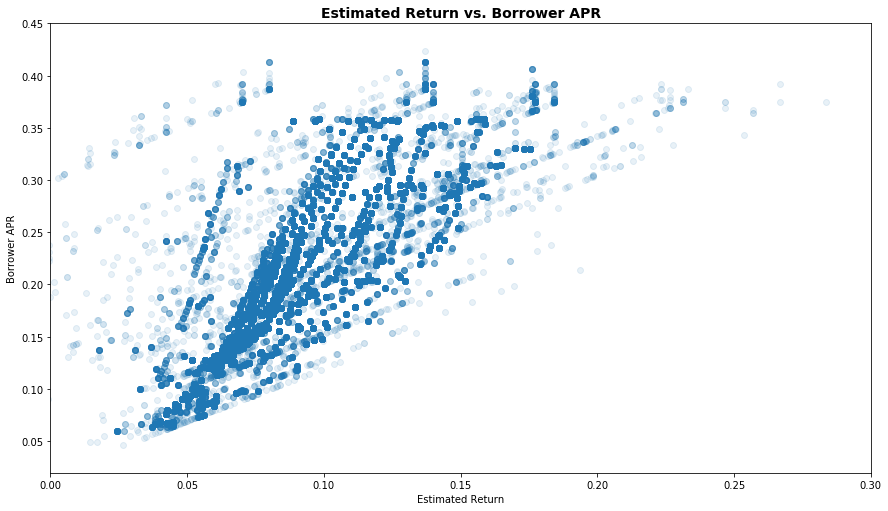

In [7]:
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = df_EstimatedReturn, x = 'EstimatedReturn', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, .3])
plt.xlabel('Estimated Return')
plt.ylabel('Borrower APR')
plt.title("Estimated Return vs. Borrower APR", fontsize =14, weight = "bold")
plt.show()


## Credit Score Range Upper Vs Borrower APR Vs Prosper Rating

> This shows that the higher the prosper rating the lower the Borrower APR and higher the credit score range upper is.

Text(0,0.5,'Borrower APR')

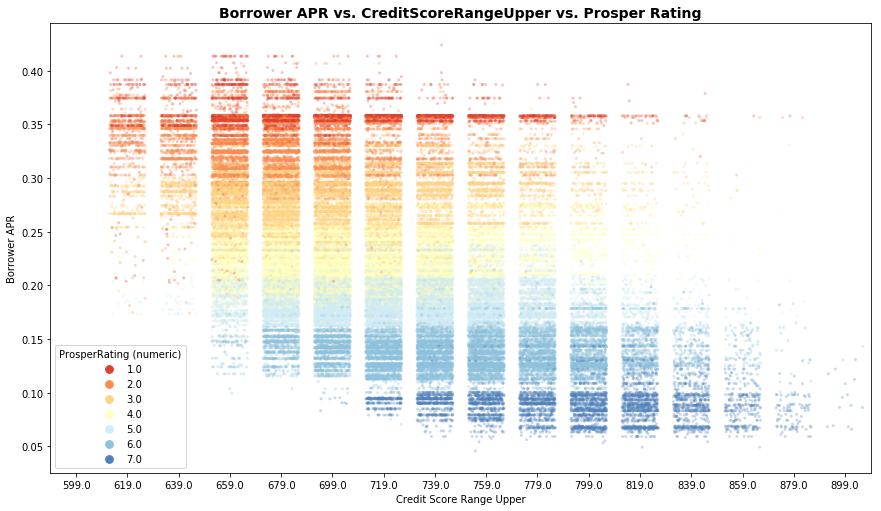

In [8]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data =  df[df.CreditScoreRangeUpper > 590],
             x = 'CreditScoreRangeUpper', y = 'BorrowerAPR',  hue ='ProsperRating (numeric)',
             palette = "RdYlBu", alpha = 0.3, jitter = .35, size = 3)



plt.title('Borrower APR vs. CreditScoreRangeUpper vs. Prosper Rating', fontsize =14, weight = "bold")
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Borrower APR')



## Credit Score Range Upper Vs Esimated Return Vs Prosper Rating

> This shows that the higher the credit scor range upper the higher the Prosper Rating and the less variability there is in the Estimated Return.

(-0.1, 0.2)

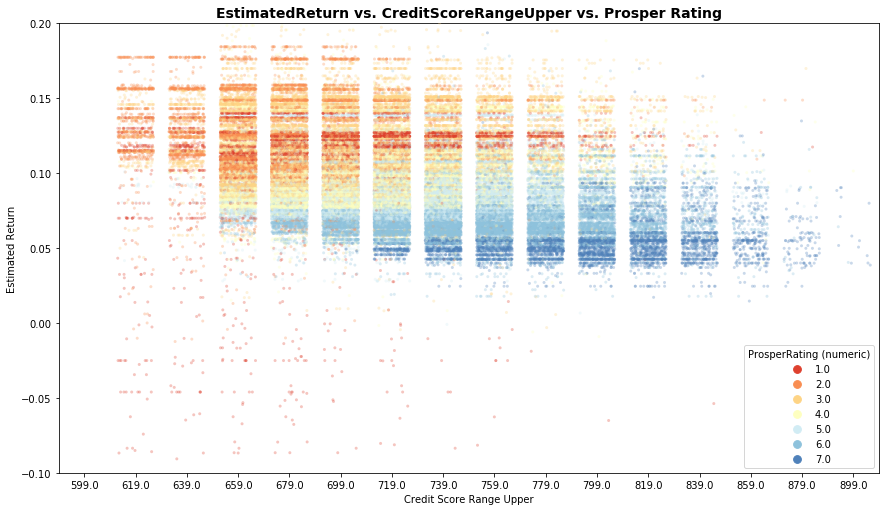

In [9]:
plt.figure(figsize=[14.70, 8.27])

sb.stripplot(data =  df[df.CreditScoreRangeUpper > 590],
             x = 'CreditScoreRangeUpper', y = 'EstimatedReturn',  hue ='ProsperRating (numeric)',
             palette = "RdYlBu", alpha = 0.3, jitter = .35, size = 3)


plt.title('EstimatedReturn vs. CreditScoreRangeUpper vs. Prosper Rating', fontsize =14, weight = "bold")
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Estimated Return')
plt.ylim([-0.1, 0.2])

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_ProsperPineda.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_ProsperPineda.ipynb to slides
[NbConvertApp] Writing 1390576 bytes to slide_deck_ProsperPineda.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_ProsperPineda.slides.html
Use Control-C to stop this server
